## Misfold Database

- Extraction

- Analysis

In [2]:
print(len("EEHEE_rd1_"))

10


In [101]:
import pandas as pd

myfile="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD1.txt"

df = pd.read_csv(myfile,sep='\t')

# print(df.head())
data=df["name"].str.contains("EEHEE_rd1_") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random")
# hp=df["name"].str.contains("hp")
# random=df["name"].str.contains("random")
# columns=df[["name","sequence","stabilityscore"]]
# print(df[data & ~hp & ~random & columns].head())
# print(df.loc[df['name'] == "EEHEE_rd1_0001.pdb"])
# print(df.loc[data,["name","sequence","stabilityscore"]].head())
data_sele=(df.loc[data,["name","sequence","stabilityscore"]])

print(data_sele.iloc[1])



name                                       EEHEE_rd1_0002.pdb
sequence          GSYELEVGNYRYRADDPEQLKEEAKKVGARDVQTDGNNFKVRG
stabilityscore                                          -0.14
Name: 3, dtype: object


## Identify missing data

By checking the length of the data and comparing to the code value, there is a mismatch by 19 elements. A quick search showed that the data is missing a few elements.

In [100]:
import pandas as pd

myfile="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD1.txt"
df = pd.read_csv(myfile,sep='\t')

data=df["name"].str.contains("EEHEE_rd1_") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random")
data_sele=(df.loc[data,["name","sequence","stabilityscore"]])

print(f"The size of the RD1_EEHEE data is : {len(data_sele.iloc[:,0])}")
print(f"The value of the last number in the RD1_EEHEE data is : {data_sele.iloc[-1,0][10:14]}")
print(f"There are missing {int(data_sele.iloc[-1,0][10:14])-len(data_sele.iloc[:,0])} data points.")
miss=[]
for i in range(len(data_sele.iloc[:,0])):
    if i !=0:
        if int((data_sele.iloc[i,0][10:14]))-int(data_sele.iloc[i-1,0][10:14])!= 1:
            miss.append(int(data_sele.iloc[i,0][10:14])-1)
print(f"This is the list of the elements missing: \n {miss}" )

The size of the RD1_EEHEE data is : 1134
The value of the last number in the RD1_EEHEE data is : 1153
There are missing 19 data points.
This is the list of the elements missing: 
 [134, 201, 333, 335, 368, 411, 462, 540, 548, 571, 609, 725, 751, 787, 797, 917, 1075, 1078, 1111]


In [124]:
import pandas as pd

RD1_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD1.txt"
dic_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Misfold_dicts.py"

df = pd.read_csv(RD1_file,sep='\t')

data=df["name"].str.contains("EEHEE_rd1_") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random")
hp=df["name"].str.contains("hp")

data_sele=(df.loc[data,["name","sequence","stabilityscore"]])

print(type(data_sele.iloc[1,2]))

<class 'numpy.float64'>


## Create General Framework to Move datafram data into a list of dictionaries

In [135]:
import pandas as pd
from Rotatory_library import rotatory, rot_density

RD1_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD1.txt"
dic_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Misfold_dicts.py"

df = pd.read_csv(RD1_file,sep='\t')

data=df["name"].str.contains("EEHEE_") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random")
hp=df["name"].str.contains("hp")

data_sele=(df.loc[data,["name","sequence","stabilityscore"]])

data_sele
def import_to_lst(dataframe):
    mis_lst=[]
    for i in range(len(dataframe.iloc[:,0])):
        mis_dic={ "Code":"" , "Topology":"" , "Round":"" , "Sequence":"" , "Stability_Score":"" 
                    , "Rotatable_Bonds":"" , "Rotatable_Bonds_Density": "" }
        lst_values=data_sele.iloc[i,0].split("_")
        mis_dic["Code"]=int(lst_values[2][:4])
        mis_dic["Topology"]=lst_values[0]
        mis_dic["Round"]=lst_values[1].upper()
        mis_dic["Sequence"]=data_sele.iloc[i,1][2:]
        mis_dic["Stability_Score"]=float(data_sele.iloc[i,2])
        mis_dic["Rotatable_Bonds"]=rotatory(data_sele.iloc[i,1][2:])
        mis_dic["Rotatable_Bonds_Density"]=rot_density(data_sele.iloc[i,1][2:])
        mis_lst.append(mis_dic)
        mis_dic={ "Code":"" , "Topology":"" , "Round":"" , "Sequence":"" , "Stability_Score":"" }
    return mis_lst
print("Finish")

EEHEE_RD1=import_to_lst(data_sele)
print(len(EEHEE_RD1))
print(EEHEE_RD1[-1])


with open(dic_file, "a") as misfold_file:
    misfold_file.write("\nEEHEE_RD1_Lst=%s" % EEHEE_RD1)

Finish
1134
{'Code': 1153, 'Topology': 'EEHEE', 'Round': 'RD1', 'Sequence': 'TTVEDNGDEYEARSTEEARKWAKKSGAKRIEERGNRVRVES', 'Stability_Score': -0.24, 'Rotatable_Bonds': 87, 'Rotatable_Bonds_Density': 2.12195}


## Creating one list with all EEHEE topologies

In [26]:
import pandas as pd
import pickle
from Rotatory_library import rotatory, rot_density

RD1_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD1.txt"
RD2_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD2.txt"
RD3_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD3.txt"
RD4_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD4.txt"
files=[RD1_file,RD2_file, RD3_file, RD4_file]

def import_to_lst(file, round_number):
    df = pd.read_csv(file,sep='\t')
    data=df["name"].str.contains(f"EEHEE_{round_number.lower()}") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random") & ~df["name"].str.contains("PG_hp") & ~df["name"].str.contains("buryD")
    data_sele=(df.loc[data,["name","sequence","stabilityscore"]])
    mis_lst=[]
    for i in range(len(data_sele.iloc[:,0])):
        mis_dic={ "Code":"" , "Topology":"" , "Round":"" , "Sequence":"" , "Stability_Score":"" 
                    , "Rotatable_Bonds":"" , "Rotatable_Bonds_Density": "" }
        lst_values=data_sele.iloc[i,0].split("_")
        mis_dic["Code"]=int(lst_values[2][:4])
        mis_dic["Topology"]=lst_values[0]
        mis_dic["Round"]=lst_values[1].upper()
        if data_sele.iloc[i,1][:2]=="GS":
            mis_dic["Sequence"]=data_sele.iloc[i,1][2:]
        else:
            mis_dic["Sequence"]=data_sele.iloc[i,1]
        mis_dic["Stability_Score"]=float(data_sele.iloc[i,2])
        if data_sele.iloc[i,1][:2]=="GS":
            mis_dic["Rotatable_Bonds"]=rotatory(data_sele.iloc[i,1][2:])
        else:
            mis_dic["Rotatable_Bonds"]=rotatory(data_sele.iloc[i,1])
        if data_sele.iloc[i,1][:2]=="GS":
            mis_dic["Rotatable_Bonds_Density"]=rot_density(data_sele.iloc[i,1][2:])
        else:
            mis_dic["Rotatable_Bonds_Density"]=rot_density(data_sele.iloc[i,1])
        mis_lst.append(mis_dic)
    return mis_lst
# for file in files:
#     print(import_to_lst(file)[-1])
Lst_all_rounds=[]
for file in files:
    Lst_all_rounds+=(import_to_lst(file,file[-7:-4]))

#### Save in a .py file ############
# dic_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EEHEE.py"
# with open(dic_file, "w") as misfold_file:
#     misfold_file.write("EEHEE_Lst=%s" % Lst_all_rounds)

#### Save in a  .pickle file ###########
path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EEHEE.pickle"
with open(path, "wb") as misfold_file:
    pickle.dump(Lst_all_rounds,misfold_file)

## Creating on list with all HHH topologies, one with all EHEE topologies, and one with all HEEH topologies

In [29]:
import pandas as pd
import pickle
from Rotatory_library import rotatory, rot_density

RD1_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD1.txt"
RD2_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD2.txt"
RD3_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD3.txt"
RD4_file="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\RD4.txt"
files=[RD1_file,RD2_file, RD3_file, RD4_file]

def HHH_import_to_lst(file, round_number):
    df = pd.read_csv(file,sep='\t')
    data=df["name"].str.contains(f"HHH_{round_number.lower()}") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random") & ~df["name"].str.contains("PG_hp") & ~df["name"].str.contains("buryD")
    data_sele=(df.loc[data,["name","sequence","stabilityscore"]])
    mis_lst=[]
    for i in range(len(data_sele.iloc[:,0])):
        mis_dic={ "Code":"" , "Topology":"" , "Round":"" , "Sequence":"" , "Stability_Score":"" 
                    , "Rotatable_Bonds":"" , "Rotatable_Bonds_Density": "" }
        lst_values=data_sele.iloc[i,0].split("_")
        mis_dic["Code"]=int(lst_values[2][:4])
        mis_dic["Topology"]=lst_values[0]
        mis_dic["Round"]=lst_values[1].upper()
        mis_dic["Sequence"]=data_sele.iloc[i,1]
        mis_dic["Stability_Score"]=float(data_sele.iloc[i,2])
        mis_dic["Rotatable_Bonds"]=rotatory(data_sele.iloc[i,1])
        mis_dic["Rotatable_Bonds_Density"]=rot_density(data_sele.iloc[i,1])
        mis_lst.append(mis_dic)
    return mis_lst

def HEEH_import_to_lst(file, round_number):
    df = pd.read_csv(file,sep='\t')
    data=df["name"].str.contains(f"HEEH_{round_number.lower()}") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random") & ~df["name"].str.contains("PG_hp") & ~df["name"].str.contains("buryD")
    data_sele=(df.loc[data,["name","sequence","stabilityscore"]])
    mis_lst=[]
    for i in range(len(data_sele.iloc[:,0])):
        mis_dic={ "Code":"" , "Topology":"" , "Round":"" , "Sequence":"" , "Stability_Score":"" 
                    , "Rotatable_Bonds":"" , "Rotatable_Bonds_Density": "" }
        lst_values=data_sele.iloc[i,0].split("_")
        mis_dic["Code"]=int(lst_values[2][:4])
        mis_dic["Topology"]=lst_values[0]
        mis_dic["Round"]=lst_values[1].upper()
        mis_dic["Sequence"]=data_sele.iloc[i,1]
        mis_dic["Stability_Score"]=float(data_sele.iloc[i,2])
        mis_dic["Rotatable_Bonds"]=rotatory(data_sele.iloc[i,1])
        mis_dic["Rotatable_Bonds_Density"]=rot_density(data_sele.iloc[i,1])
        mis_lst.append(mis_dic)
    return mis_lst

def EHEE_import_to_lst(file, round_number):
    df = pd.read_csv(file,sep='\t')
    data=df["name"].str.contains(f"EHEE_{round_number.lower()}") & ~df["name"].str.contains("hp") & ~df["name"].str.contains("random") & ~df["name"].str.contains("PG_hp") & ~df["name"].str.contains("buryD")
    data_sele=(df.loc[data,["name","sequence","stabilityscore"]])
    mis_lst=[]
    for i in range(len(data_sele.iloc[:,0])):
        mis_dic={ "Code":"" , "Topology":"" , "Round":"" , "Sequence":"" , "Stability_Score":"" 
                    , "Rotatable_Bonds":"" , "Rotatable_Bonds_Density": "" }
        lst_values=data_sele.iloc[i,0].split("_")
        mis_dic["Code"]=int(lst_values[2][:4])
        mis_dic["Topology"]=lst_values[0]
        mis_dic["Round"]=lst_values[1].upper()
        if data_sele.iloc[i,1][:2]=="GS":
            mis_dic["Sequence"]=data_sele.iloc[i,1][2:]
        else:
            mis_dic["Sequence"]=data_sele.iloc[i,1]
        mis_dic["Stability_Score"]=float(data_sele.iloc[i,2])
        if data_sele.iloc[i,1][:2]=="GS":
            mis_dic["Rotatable_Bonds"]=rotatory(data_sele.iloc[i,1][2:])
        else:
            mis_dic["Rotatable_Bonds"]=rotatory(data_sele.iloc[i,1])
        if data_sele.iloc[i,1][:2]=="GS":
            mis_dic["Rotatable_Bonds_Density"]=rot_density(data_sele.iloc[i,1][2:])
        else:
            mis_dic["Rotatable_Bonds_Density"]=rot_density(data_sele.iloc[i,1])
        mis_lst.append(mis_dic)
    return mis_lst
# for file in files:
#     print(import_to_lst(file)[-1])
HHH_Lst_all_rounds=[]
EHEE_Lst_all_rounds=[]
HEEH_Lst_all_rounds=[]
for file in files:
    HHH_Lst_all_rounds+=(HHH_import_to_lst(file,file[-7:-4]))
    EHEE_Lst_all_rounds+=(EHEE_import_to_lst(file,file[-7:-4]))
    HEEH_Lst_all_rounds+=(HEEH_import_to_lst(file,file[-7:-4]))

HHH_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_HHH.pickle"
EHEE_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EHEE.pickle"
HEEH_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_HEEH.pickle"
with open(HHH_path, "wb") as pickle_input:
    pickle.dump(HHH_Lst_all_rounds,pickle_input)
with open(EHEE_path, "wb") as pickle_input:
    pickle.dump(EHEE_Lst_all_rounds,pickle_input)
with open(HEEH_path, "wb") as pickle_input:
    pickle.dump(HEEH_Lst_all_rounds,pickle_input)

## Creating a list with all topologies together

In [34]:
EEHEE_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EEHEE.pickle"
HHH_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_HHH.pickle"
EHEE_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EHEE.pickle"
HEEH_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_HEEH.pickle"
All_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_All.pickle"
with open(HHH_path, "rb") as pickle_output:
    HHH=pickle.load(pickle_output)
    with open(EHEE_path, "rb") as pickle_output:
        EHEE=pickle.load(pickle_output)
        with open(HEEH_path, "rb") as pickle_output:
            HEEH=pickle.load(pickle_output)
            with open(EEHEE_path, "rb") as pickle_output:
                EEHEE=pickle.load(pickle_output)
                lst_variables=[HHH,EHEE,HEEH,EEHEE]
                lst_all=[]
                for variable in lst_variables:
                    lst_all+=variable
                with open(All_path,"wb") as pickle_input:
                    pickle.dump(lst_all,pickle_input)


In [35]:
import pandas as pd
All_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_All.pickle"

with open(All_path,"rb") as pickle_output:
    All=pickle.load(pickle_output)
    df=pd.DataFrame(All)
    No_null=df[~df['Stability_Score'].isnull()]
    print(len(No_null["Stability_Score"]))

21395


## Looking at EEHEE Rot Bonds VS Stability

Since the presence of None groups is False, for the No_null dataframe subgroup, we can use it.
The maximum value rotatable Bond Density of all design values is 2.5122,
while the minimum value is 1.41463, the mean is 1.886671732748761, the median is 1.87805


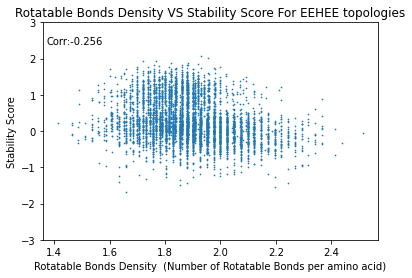

In [33]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statistics as stats

path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EEHEE.pickle"
with open(path,"rb") as import_pickle:
    data=pickle.load(import_pickle)
    df=pd.DataFrame(data)
    No_null=df[~df['Stability_Score'].isnull()]
    print(f"Since the presence of None groups is {No_null.isnull().values.any()}, for the No_null dataframe subgroup, we can use it.")
    Rot_Den=list(No_null["Rotatable_Bonds_Density"])
    Stab_score=list(No_null["Stability_Score"])
    
    Dct={'xlabel':Rot_Den,'ylabel':Stab_score}
    print(f"""The maximum value rotatable Bond Density of all design values is {max(Rot_Den)},
while the minimum value is {min(Rot_Den)}, the mean is {stats.mean(Rot_Den)}, the median is {stats.median(Rot_Den)}""")

    plt.plot('xlabel', 'ylabel', data=Dct, linestyle='', marker='o', markersize=0.7, label='Protein DataPoints',alpha=1, zorder=2.5) # zorder puts the layer
    plt.title('Rotatable Bonds Density VS Stability Score For EEHEE topologies')
    plt.xlabel('Rotatable Bonds Density  (Number of Rotatable Bonds per amino acid)')
    plt.ylabel('Stability Score')
    plt.ylim([int(round(min(Stab_score)-1,0)), int(round(max(Stab_score)+1,2))])
    plt.text(plt.xlim()[0]+((plt.xlim()[1]-plt.xlim()[0])*0.01),
                        plt.ylim()[1]*0.8,"Corr:{:.3f}".format(pearsonr(Rot_Den,Stab_score)[0]))#,pearsonr(RRt_Den,Ros_Den)[1]))


##### Analysing the .py file ####################

# import sys
# sys.path.insert(1, 'D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data') # Add to Python PATH at runtime
# import pandas as pd
# from Misfold_dicts import EEHEE_Lst

Since the presence of None groups is False, for the No_null dataframe subgroup, we can use it.
The maximum value rotatable Bond Density of all design values is 2.7907,
while the minimum value is 1.41463, the mean is 2.010393487263379, the median is 2.0


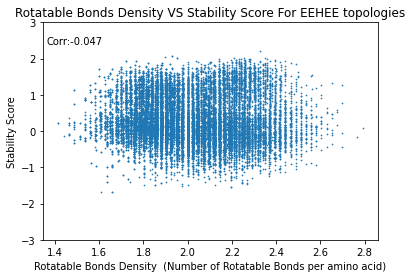

In [56]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statistics as stats

path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_All.pickle"
with open(path,"rb") as import_pickle:
    data=pickle.load(import_pickle)
    df=pd.DataFrame(data)
    No_null=df[~df['Stability_Score'].isnull()]
    print(f"Since the presence of None groups is {No_null.isnull().values.any()}, for the No_null dataframe subgroup, we can use it.")
    Rot_Den=list(No_null["Rotatable_Bonds_Density"])
    Stab_score=list(No_null["Stability_Score"])
    
    Dct={'xlabel':Rot_Den,'ylabel':Stab_score}
    print(f"""The maximum value rotatable Bond Density of all design values is {max(Rot_Den)},
while the minimum value is {min(Rot_Den)}, the mean is {stats.mean(Rot_Den)}, the median is {stats.median(Rot_Den)}""")

    plt.plot('xlabel', 'ylabel', data=Dct, linestyle='', marker='o', markersize=0.7, label='Protein DataPoints',alpha=1, zorder=2.5) # zorder puts the layer
    plt.title('Rotatable Bonds Density VS Stability Score For EEHEE topologies')
    plt.xlabel('Rotatable Bonds Density  (Number of Rotatable Bonds per amino acid)')
    plt.ylabel('Stability Score')
    plt.ylim([int(round(min(Stab_score)-1,0)), int(round(max(Stab_score)+1,2))])
    plt.text(plt.xlim()[0]+((plt.xlim()[1]-plt.xlim()[0])*0.01),
                        plt.ylim()[1]*0.8,"Corr:{:.3f}".format(pearsonr(Rot_Den,Stab_score)[0]))#,pearsonr(RRt_Den,Ros_Den)[1]))

## Looking at it all!

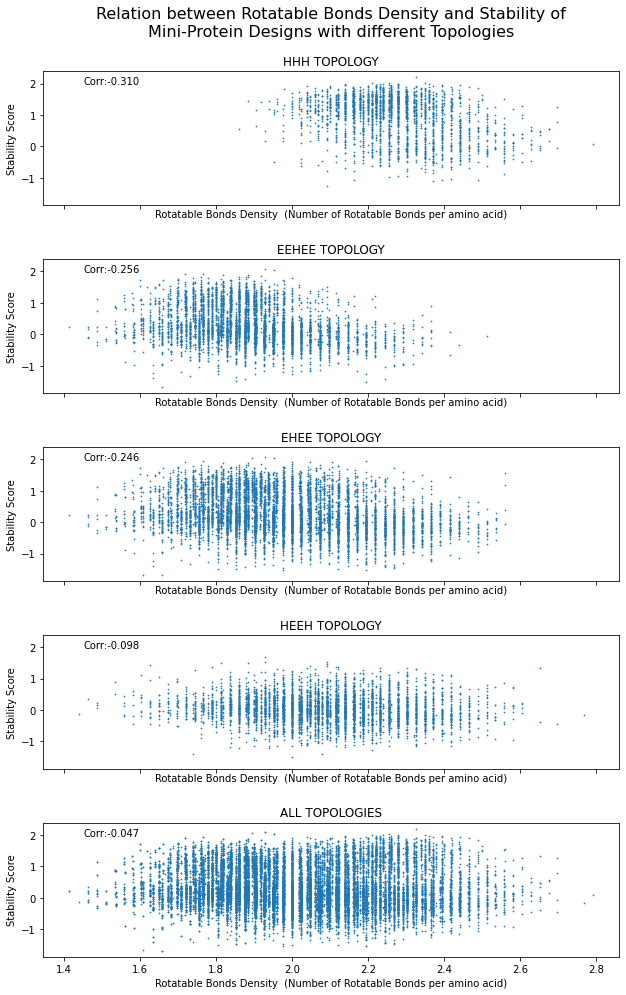

In [6]:
import pickle
from textwrap import wrap
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statistics as stats

EEHEE_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EEHEE.pickle"
HHH_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_HHH.pickle"
EHEE_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_EHEE.pickle"
HEEH_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_HEEH.pickle"
All_path="D:\OneDrive - University of Edinburgh\Python\Python-VSC\Thesis_Project\Lab\Misfold_data\Lst_Dcs_All.pickle"




with open(HHH_path, "rb") as pickle_output:
    HHH=pickle.load(pickle_output)
    HHH_df=pd.DataFrame(HHH)
    HHH_NNull=HHH_df[~HHH_df['Stability_Score'].isnull()]
    HHH_Rot_Den=list(HHH_NNull["Rotatable_Bonds_Density"])
    HHH_Stab_score=list(HHH_NNull["Stability_Score"])
with open(EHEE_path, "rb") as pickle_output:
    EHEE=pickle.load(pickle_output)
    EHEE_df=pd.DataFrame(EHEE)
    EHEE_NNull=EHEE_df[~EHEE_df['Stability_Score'].isnull()]
    EHEE_Rot_Den=list(EHEE_NNull["Rotatable_Bonds_Density"])
    EHEE_Stab_score=list(EHEE_NNull["Stability_Score"])
with open(HEEH_path, "rb") as pickle_output:
    HEEH=pickle.load(pickle_output)
    HEEH_df=pd.DataFrame(HEEH)
    HEEH_NNull=HEEH_df[~HEEH_df['Stability_Score'].isnull()]
    HEEH_Rot_Den=list(HEEH_NNull["Rotatable_Bonds_Density"])
    HEEH_Stab_score=list(HEEH_NNull["Stability_Score"])
with open(EEHEE_path, "rb") as pickle_output:
    EEHEE=pickle.load(pickle_output)
    EEHEE_df=pd.DataFrame(EEHEE)
    EEHEE_NNull=EEHEE_df[~EEHEE_df['Stability_Score'].isnull()]
    EEHEE_Rot_Den=list(EEHEE_NNull["Rotatable_Bonds_Density"])
    EEHEE_Stab_score=list(EEHEE_NNull["Stability_Score"])
with open(All_path, "rb") as pickle_output:
    ALL=pickle.load(pickle_output)
    ALL_df=pd.DataFrame(ALL)
    ALL_NNull=ALL_df[~ALL_df['Stability_Score'].isnull()]
    ALL_Rot_Den=list(ALL_NNull["Rotatable_Bonds_Density"])
    ALL_Stab_score=list(ALL_NNull["Stability_Score"])


    HHH_Dict={'xlabel':HHH_Rot_Den,'ylabel':HHH_Stab_score}   
    HEEH_Dict={'xlabel':HEEH_Rot_Den,'ylabel':HEEH_Stab_score}   
    EEHEE_Dict={'xlabel':EEHEE_Rot_Den,'ylabel':EEHEE_Stab_score}   
    EHEE_Dict={'xlabel':EHEE_Rot_Den,'ylabel':EHEE_Stab_score}   
    ALL_Dict={'xlabel':ALL_Rot_Den,'ylabel':ALL_Stab_score}   


    fig,ax= plt.subplots(5, 1,sharex=True, sharey=True, figsize = (10,15))
    suptitle="Relation between Rotatable Bonds Density and Stability of Mini-Protein Designs with different Topologies"
    fig.suptitle('\n'.join(wrap(suptitle,60)),fontsize=16)
    title00 = 'HHH TOPOLOGY'
    title01 = 'EEHEE TOPOLOGY'
    title02 = 'EHEE TOPOLOGY'
    title03 = 'HEEH TOPOLOGY'
    title04 = 'ALL TOPOLOGIES'

    # Plot 1st ax[4] so that the legends of all plots can match it once it is load
    ax[4].plot('xlabel' , 'ylabel' , data=ALL_Dict , linestyle='', marker='o', label = "Protein Data", markersize=0.7,  zorder=2.5) # zorder puts the layer
    ax[4].set_title('\n'.join(wrap(title04,30)))
    ax[4].set_xlabel('Rotatable Bonds Density  (Number of Rotatable Bonds per amino acid)')
    ax[4].set_ylabel('Stability Score')
    ax[4].text(ax[4].get_xlim()[0]+((ax[4].get_xlim()[1]-ax[4].get_xlim()[0])*0.07),
                        ax[4].get_ylim()[0]+((ax[4].get_ylim()[1]-ax[4].get_ylim()[0])*0.9),
                        "Corr:{:.3f}".format(pearsonr(ALL_Rot_Den,ALL_Stab_score)[0]))

    ax[0].plot('xlabel' , 'ylabel' , data=HHH_Dict , linestyle='', marker='o', label = "Protein Data", markersize=0.7,  zorder=2.5) # zorder puts the layer
    ax[0].set_title('\n'.join(wrap(title00,30)))
    ax[0].set_xlabel('Rotatable Bonds Density  (Number of Rotatable Bonds per amino acid)')
    ax[0].set_ylabel('Stability Score')
    ax[0].text(ax[4].get_xlim()[0]+((ax[4].get_xlim()[1]-ax[4].get_xlim()[0])*0.07),
                        ax[4].get_ylim()[0]+((ax[4].get_ylim()[1]-ax[4].get_ylim()[0])*0.9),
                        "Corr:{:.3f}".format(pearsonr(HHH_Rot_Den,HHH_Stab_score)[0]))

    ax[1].plot('xlabel' , 'ylabel' , data=EEHEE_Dict , linestyle='', marker='o', label = "Protein Data", markersize=0.7,  zorder=2.5) # zorder puts the layer
    ax[1].set_title('\n'.join(wrap(title01,30)))
    ax[1].set_xlabel('Rotatable Bonds Density  (Number of Rotatable Bonds per amino acid)')
    ax[1].set_ylabel('Stability Score')
    ax[1].text(ax[4].get_xlim()[0]+((ax[4].get_xlim()[1]-ax[4].get_xlim()[0])*0.07),
                        ax[4].get_ylim()[0]+((ax[4].get_ylim()[1]-ax[4].get_ylim()[0])*0.9),
                        "Corr:{:.3f}".format(pearsonr(EEHEE_Rot_Den,EEHEE_Stab_score)[0]))


    ax[2].plot('xlabel' , 'ylabel' , data=EHEE_Dict , linestyle='', marker='o', label = "Protein Data", markersize=0.7,  zorder=2.5) # zorder puts the layer
    ax[2].set_title('\n'.join(wrap(title02,30)))
    ax[2].set_xlabel('Rotatable Bonds Density  (Number of Rotatable Bonds per amino acid)')
    ax[2].set_ylabel('Stability Score')
    ax[2].text(ax[4].get_xlim()[0]+((ax[4].get_xlim()[1]-ax[4].get_xlim()[0])*0.07),
                        ax[4].get_ylim()[0]+((ax[4].get_ylim()[1]-ax[4].get_ylim()[0])*0.9),
                        "Corr:{:.3f}".format(pearsonr(EHEE_Rot_Den,EHEE_Stab_score)[0]))


    ax[3].plot('xlabel' , 'ylabel' , data=HEEH_Dict , linestyle='', marker='o', label = "Protein Data", markersize=0.7,  zorder=2.5) # zorder puts the layer
    ax[3].set_title('\n'.join(wrap(title03,30)))
    ax[3].set_xlabel('Rotatable Bonds Density  (Number of Rotatable Bonds per amino acid)')
    ax[3].set_ylabel('Stability Score')
    ax[3].text(ax[4].get_xlim()[0]+((ax[4].get_xlim()[1]-ax[4].get_xlim()[0])*0.07),
                        ax[4].get_ylim()[0]+((ax[4].get_ylim()[1]-ax[4].get_ylim()[0])*0.9),
                        "Corr:{:.3f}".format(pearsonr(HEEH_Rot_Den,HEEH_Stab_score)[0]))

    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.92, 
                    wspace=0.5, 
                    hspace=0.40)

    # plt.rcParams['figure.dpi'] = 2000
                        



In [4]:
lst=[0,1,2,3,4,5,6,7,8,9]

new_lst=[]

for number in range (12):
    new_lst+=lst[number]

print(new_lst)


TypeError: 'int' object is not iterable